In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
#define variables

In [3]:
q = 1
sigma = 2 
walks = 500
R = 1
T=1
N = 500
dt = T/N
sigmaSqrtDt = sigma * np.sqrt(T/N)
def u(X) :
    pre = q / (2*np.pi * (X[0]**2 + X[1]**2)) 
    return np.array([1+pre*X[0], pre*X[1]])

In [4]:
times = np.linspace(0,T,N)
X = np.zeros((2,N))
X[:,0] = [1.2,1.1]
#X[:,0] = [3,4]
#X[:,0] = [2.5,2.5]

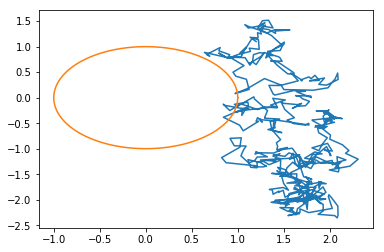

In [5]:
#diff equation
for i in range(N-1):
    X[:,i+1] = X[:,i] + u(X[:,i]) * dt + sigmaSqrtDt* norm.rvs(size=2) 
plt.plot(X[0,:],X[1,:])

#plots the well
theta = np.linspace(0,2*np.pi,100)
plt.plot(R*np.cos(theta),R*np.sin(theta))

In [9]:
polluted = 0
X_this = [1.1,1.2]
X_next = X_this
for w in range(walks):
    #diff equation
    for i in range(N-1):
        X_next = X_this + u(X_this) * dt + sigmaSqrtDt* norm.rvs(size=2) 
        r = np.sqrt( X_next[0]**2 + X_next[1]**2 )
        if (r = 1): break
    if (r >= R) : polluted+=1

print(polluted/walks)

1.0


In [7]:
u([1,1])

array([1.07957747, 0.07957747])